## Outline

* [1. Problem Overview](#0)
* [2. Performance Metrics](#1)
* [3. Dataset Description](#2)
* [4. Exploratory Data Analysis](#3)
    * [4.1 Loading Data](#3.1)    
    * [4.2. Data Visualisation](#3.2)
* [5. Data Preparation](#4)
    * [5.1 Data Cleaning](#4.1)    
    * [5.2.Data Preprocessing](#4.2) 
* [6. Evaluate Algorithms and Models](#5)        
    * [6.1. Traing Models using BOW](#5.1)
        * [6.1.1 Machine Learning using Logistic Regression and Evaluation](#5.1.1)
        * [6.1.2 Machine Learning using Multinomial Naive Bayes and Evaluation](#5.1.2)
        * [6.1.3 Machine Learning using Gradient Boosted DT and Evaluation](#5.1.3)
    * [6.2. Training Models using Glove embeddings](#5.2)
        * [6.2.1 Machine Learning using Logistic Regression and Evaluation](#5.2.1)
        * [6.2.2 Machine Learning using Gradient Boosted DT and Evaluation](#5.2.2)
    * [6.3 Training using LSTM](#5.3)
    * [6.4 Training using BERT](#5.4)
 

<a id='0'></a>
## 1. Problem Overview 

MachineHack describes this competition as follows:

Foreseeing bugs, features, and questions on GitHub can be fun, especially when one is provided with a colossal dataset containing the GitHub issues. In this hackathon, we are challenging the MachineHack community to come up with an algorithm that can predict the bugs, features, and questions based on GitHub titles and the text body. With text data, there can be a lot of challenges especially when the dataset is big. Analyzing such a dataset requires a lot to be taken into account mainly due to the preprocessing involved to represent raw text and make them machine-understandable. Usually, we stem and lemmatize the raw information and then represent it using TF-IDF, Word Embeddings, etc.

However, provided the state-of-the-art NLP models such as Transformer based BERT models one can skip the manual feature engineering like TF-IDF and Count Vectorizers. In this short span of time, we would encourage you to leverage the ImageNet moment (Transfer Learning) in NLP using various pre-trained models.

<a id='1'></a>
## 2. Performance Metric

The problem is a multi class classification problem where a new issue needs to be classified as a bug, feature or question.

Metric(s): 
* Multi class log-loss 
* Confusion matrix 
* ROC AUC score


<a id='2'></a>
## 3. Dataset Description

- Train.json - 150000 rows x 3 columns (Includes label Column as Target variable) - Size 93.7 MB

- Test.json - 30000 rows x 2 columns - Size 18.4 MB

- Train_extra.json - 300000 rows x 3 columns - Size 186 MB (Includes label Column as Target variable)
Provided solely for training purposes, can be appended in the train.json for training the model
    
**Attribute Description:**
  
- Title - the title of the GitHub bug, feature, question
- Body - the body of the GitHub bug, feature, question
- Label - Represents various classes of Labels - Bug - 0, Feature - 1, Question - 2 

<a id='3'></a>
## 4. Exploratory Data Analysis

<a id='3.1'></a>
## 4.1 Loading data

In [1]:
import pandas as pd
import datetime as dt

start = dt.datetime.now()

df_1 = pd.read_json('embold_train.json')
df_2 = pd.read_json('embold_train_extra.json')
df_3 = pd.read_json('embold_test.json')

print("Time taken to run this cell :", dt.datetime.now() - start)

Time taken to run this cell : 0:00:02.665544


We will be using the train and extra train datasets for analysis and evaluation.

In [2]:
df_1.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


In [3]:
df_1['label'].value_counts()

1    69106
0    66827
2    14067
Name: label, dtype: int64

In [4]:
df_2.head()

,title,body,label
0,use a 8bit typeface,since this is meant to emulate some old arcade...,1
1,implement wireless m-bus binding,_from chris.pa...@googlemail.com https://cod...,1
2,add multilang support for timeago.js,currently it is only en . \r required to add ...,1
3,scaleway - seg-fault on shutdown,tbr irc creates a new scaleway instance with...,0
4,sistema de pintura: no se guardar los nuevos p...,este sp ya estaba asignado a un carro y se enc...,0


In [5]:
df_2.label.value_counts()

1    138212
0    133654
2     28134
Name: label, dtype: int64

In [6]:
df_3.head()

,title,body
0,config question path-specific environment var...,issue description or question\r \r hey @artemg...
1,crash indien vol,de simulator crasht als hij vol zit
2,unable to mine rocks,"sarkasmo starting today, when i hit enter act..."
3,not all whitelists are processed,create following rules... order of creation is...
4,add ctx menu for idafree 70 and idafree 5,"associated with .dll, .dll_, .exe, .exe_, .sc,..."


<a id='3.2'></a>
## 4.2 Data Visualisation

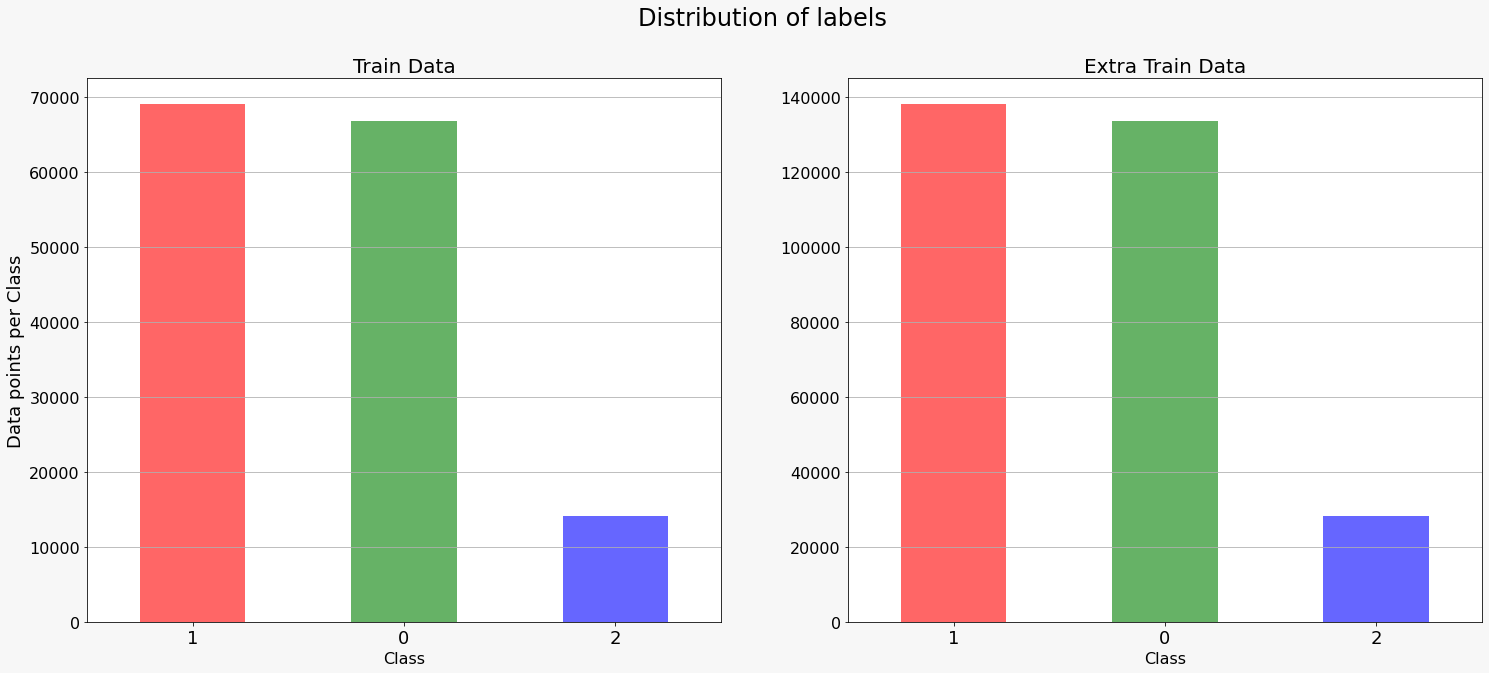

In [7]:
# Visualizing class distributions

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_dist = df_1.label.value_counts()
extra_dist = df_2.label.value_counts()


fig, ax = plt.subplots(1,2 , figsize=(25, 10), facecolor='#f7f7f7')
fig.suptitle('Distribution of labels', fontsize=24)

my_colors = ['r', 'g', 'b'] 

train_dist.plot(kind='bar', color=my_colors, alpha=0.6, ax=ax[0])

extra_dist.plot(kind='bar', color=my_colors, alpha=0.6, ax=ax[1])


ax[0].set_title("Train Data", fontsize=20)
ax[1].set_title("Extra Train Data", fontsize=20)

ax[0].set_ylabel('Data points per Class', fontsize=18)


for axes in ax:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=0, fontsize=18)
    axes.tick_params(axis='y', labelsize=16)
    axes.set_xlabel('Class', fontsize=16)
    axes.grid(axis='y')
    
plt.show()    
    

**Observations**

- The dataset is imbalanced. Class 2 - questions has very low data points in comparision with class 0 - bugs and class 1 -  feature.
- Hence, we will use Class 2 points from the extra train dataset to increase the data points of class - 2 questions. 

In [8]:
df_4 = df_2[df_2['label'] == 2]
df_4.shape

(28134, 3)

In [9]:
df_5 = pd.concat([df_1,df_4],ignore_index=True)
df_5.shape

(178134, 3)

In [10]:
df_5.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


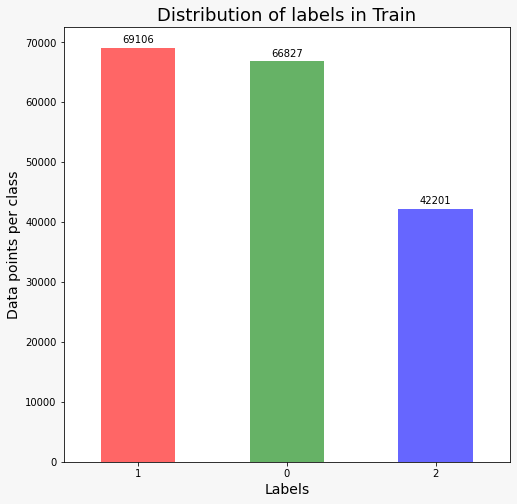

In [11]:
train_dist = df_5.label.value_counts()


plt.figure(figsize=(8, 8), facecolor='#f7f7f7')
plt.title('Distribution of labels in Train', fontsize=18)
my_colors = ['r', 'g', 'b'] 

plots = train_dist.plot(kind='bar', color=my_colors, alpha=0.6)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel('Labels', fontsize=14)
plt.ylabel('Data points per class', fontsize=14)
plt.xticks(rotation=0)
    
plt.show()    

In [12]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178134 entries, 0 to 178133
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   178134 non-null  object
 1   body    178134 non-null  object
 2   label   178134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


In [13]:
df_5.describe(include='all')

,title,body,label
count,178134,178134,178134.000000
unique,177738,178134,NaN
top,add unit tests,a y-zoom on the piano roll would be useful.,NaN
freq,16,1,NaN
mean,NaN,NaN,0.861756
std,NaN,NaN,0.770031
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


In [14]:
# Check for duplicates

duplicate = df_5[df_5.duplicated(['title', 'body'])]
duplicate

,title,body,label


<a id='4'></a>
## 5. Data Preparation

For preprocessing purpose we will merge both the title and text into a single feature.

In [15]:
df_5['text'] = df_5['title'] + " " + df_5['body']

In [16]:
df_5.head()

,title,body,label,text
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,y-zoom piano roll a y-zoom on the piano roll w...
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior in selection ! screenshot from ...
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,"auto update feature hi,\r \r great job so far,..."
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter out noisy endpoints in logs i think we ...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid on / pid off alarm actions for ardu...


<a id='4.1'></a>
## 5.1 Data Cleaning

After reading through a few randomly selected datapoints, it was found that the datasets have title and text of different languages 

In [17]:
# Identifying languages 

from langdetect import detect
from langdetect.detector import LangDetectException

def lan_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unk'

In [14]:
start = dt.datetime.now()

df_5['lang'] = df_5['text'].apply(lan_detect)

print("Time taken to run this cell :", dt.datetime.now() - start)

Time taken to run this cell : 0:16:49.392801


In [15]:
df_5['lang'].value_counts()

en    175624
fr       481
es       328
it       261
ca       225
nl       197
de       186
da       150
id        93
pt        91
cy        86
ro        81
no        78
af        60
sv        46
pl        29
sk        26
et        16
sl        15
cs        13
hr        12
tl         9
so         8
hu         5
fi         5
tr         4
sq         3
lv         1
vi         1
Name: lang, dtype: int64

English has the largest numbers as per above analysis.

For better prediction results, we will only include english data for our prediction modelling.

In [16]:
df_6 = df_5[df_5['lang'] == 'en']
df_6.shape

(175624, 5)

In [17]:
df_6.head()

,title,body,label,text,lang
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,y-zoom piano roll a y-zoom on the piano roll w...,en
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior in selection ! screenshot from ...,en
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,"auto update feature hi,\r \r great job so far,...",en
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter out noisy endpoints in logs i think we ...,en
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid on / pid off alarm actions for ardu...,en


In [20]:
# Saving train data
df_6.to_csv("raw_lang.csv", encoding='utf8', index=False)

In [1]:
# Loading train data
import pandas as pd
import datetime as dt

train_df = pd.read_csv("raw_lang.csv", encoding='utf8')

train_df.shape

(175618, 5)

<a id='4.2'></a>
## 5.2 Data Preprocessing

In [2]:
import spacy
nlp_spcy = spacy.load("en_core_web_sm", disable=["tagger", "parser","ner"])
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS = list(set(STOP_WORDS))

print("Total standard stop words list from SpaCy :",len(STOP_WORDS))
print("\nStandard stop words list from SpaCy :\n", STOP_WORDS)

Total standard stop words list from SpaCy : 326

Standard stop words list from SpaCy :
 ['been', 'who', 'whose', 'of', 'across', 'yours', 'see', 'this', 'formerly', 'have', 'keep', 'the', 'were', 'themselves', 'whoever', 'wherever', 'thus', 'another', 'eight', 'cannot', 'might', 'same', 'first', 'amount', 'thereby', "'ll", 'doing', 'beside', 'whether', 'beforehand', 'can', 'someone', 'twenty', 'thru', 'it', "'d", 'we', 'me', 'thereupon', 'should', 'several', 'move', '’re', "n't", 'whither', 'no', 'against', 'became', 'really', 'further', 'hereupon', 'how', '‘ll', 'if', 'unless', 'while', 'myself', 'well', 'herself', '‘d', 'his', 'less', 'anything', 'them', 'our', 'except', 'make', 'put', 'upon', 'others', 'into', 'again', 'yourself', "'re", "'ve", 'was', 'each', 'sometimes', 'hundred', 'somewhere', 'until', 'some', 'all', 'namely', 'before', 'seemed', 'please', 'third', 'whereupon', 'empty', 'over', '’d', 'seeming', 'on', 'onto', 'two', 'although', 'through', 'done', 'any', 'call', 'an

In [3]:
print('ll' in STOP_WORDS)

False


In [4]:
#add some redundant words like 'elif' in the stop words list
STOP_WORDS = STOP_WORDS + ['elif', 'd', 'll', 'm', 'n', 's', 't', 've']

In [5]:
# Cleaning abbreviated words helper
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)   
    return data

In [6]:
# Cleaning emojis helper
    
def remove_emojis(data):
    emoji_clean= re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
        
    data = emoji_clean.sub(r" ",data)
    return data

In [7]:
# Text cleaning tasks
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

sent = df['text'].values[4]

# remove urls from text
sent = re.compile(r"http\S+|www\.\S+").sub(r" ", sent)
print("After removing URLS")
print("-"*10)
print(sent)
print("="*100)
    
# remove all tags from text
sent = BeautifulSoup(sent, 'html.parser').get_text()
print("After removing all tags")
print("-"*10)
print(sent)
print("="*100)
    
# applying abbreviated words helper 
print("After cleaning abbreviated words")
print("-"*10)
sent = decontracted(sent)
print(sent)
print("="*100)
    
# applying cleaning emoji helper 
print("After removing emojis")
print("-"*10)
sent = remove_emojis(sent)
print(sent)
print("="*100)
    
# remove special characters
sent = re.compile(r"[^a-zA-Z0-9\s]+").sub(r" ", sent)
print("After removing special characters")
print("-"*10)
print(sent)
print("="*100)
    
# remove noisy data
sent = sent.replace("\\r", " ").strip()
sent = sent.replace("\r", " ").strip()
print("After removing noisy data")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning numeric charcters
sent = re.compile(r"\b[0-9]+\b").sub(r" ", sent)
print("After cleaning numeric charcters")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning stopwords
sent = ' '.join(word.lower() for word in sent.split() if word.lower() not in STOP_WORDS).strip()
print("After removing stopwords")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning long length words greater than 25 chars
sent = ' '.join(word.lower() for word in sent.split() if len(word) <= 25).strip()
print("After removing long length words")
print("-"*10)
print(sent)
print("="*100)
    
# apply lemmatization
sent = ' '.join(lemmatizer.lemmatize(word) for word in sent.split())
print("After applying lemmatization")
print("-"*10)
print(sent)
print("="*100)

# cleaning single letters
sent = re.compile(r"\b[a-zA-Z]\b").sub(r" ", sent)
print("After removing single letters")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning unwanted whitespaces
sent = re.compile(r"\s\s+").sub(r" ", sent)
print("After cleaning unwanted whitespaces")
print("-"*10)
print(sent)
print("="*100)

After removing URLS
----------
enable pid on / pid off alarm actions for arduino/tc4 expected behavior\r alarm actions pid on and pid off should enable / disable hardware pid on arduino/tc4 platform. rampsoak on / off may also be affected.\r \r    actual behavior\r pid state on aruidno/tc4 does not change when alarm activates.\r \r    steps to reproduce the problem\r alarm handlers only work if aw.qmc.controlbuttonflag is set  sw only? . aw.qmc.controlbuttonflag case is handled in pidon   / pidoff   functions so this condition may be able to be removed from the alarm handlers to keep them generalized for all pid types.\r \r main.py : 2802-2827\r    \r             elif self.alarmaction alarmnumber  == 17:\r                   rampsoak on\r                 if aw.qmc.device == 0 and aw.fujipid:   fuji pid\r                     aw.fujipid.setrampsoak 1 \r                 elif  aw.pidcontrol and aw.qmc.controlbuttonflag :   internal or external modbus pid control\r                     aw.pid

In [8]:
# Another sample

sent = df['text'].values[90002]

# remove urls from text
sent = re.compile(r"http\S+|www\.\S+").sub(r" ", sent)
print("After removing URLS")
print("-"*10)
print(sent)
print("="*100)
    
# remove all tags from text
sent = BeautifulSoup(sent, 'html.parser').get_text()
print("After removing all tags")
print("-"*10)
print(sent)
print("="*100)
    
# applying abbreviated words helper 
print("After cleaning abbreviated words")
print("-"*10)
sent = decontracted(sent)
print(sent)
print("="*100)
    
# applying cleaning emoji helper 
print("After removing emojis")
print("-"*10)
sent = remove_emojis(sent)
print(sent)
print("="*100)
    
# remove special characters
sent = re.compile(r"[^a-zA-Z0-9\s]+").sub(r" ", sent)
print("After removing special characters")
print("-"*10)
print(sent)
print("="*100)
    
# remove noisy data
sent = sent.replace("\\r", " ").strip()
sent = sent.replace("\r", " ").strip()
print("After removing noisy data")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning numeric charcters
sent = re.compile(r"\b[0-9]+\b").sub(r" ", sent)
print("After cleaning numeric charcters")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning stopwords
sent = ' '.join(word.lower() for word in sent.split() if word.lower() not in STOP_WORDS).strip()
print("After removing stopwords")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning long length words greater than 25 chars
sent = ' '.join(word.lower() for word in sent.split() if len(word) <= 25).strip()
print("After removing long length words")
print("-"*10)
print(sent)
print("="*100)
    
# apply lemmatization
sent = ' '.join(lemmatizer.lemmatize(word) for word in sent.split())
print("After applying lemmatization")
print("-"*10)
print(sent)
print("="*100)

# cleaning single letters
sent = re.compile(r"\b[a-zA-Z]\b").sub(r" ", sent)
print("After removing single letters")
print("-"*10)
print(sent)
print("="*100)
    
# cleaning unwanted whitespaces
sent = re.compile(r"\s\s+").sub(r" ", sent)
print("After cleaning unwanted whitespaces")
print("-"*10)
print(sent)
print("="*100)

After removing URLS
----------
pdf annotations - remaining work from:   \r -  x  zoom is mostly broken\r -  x  erase\r -     download pdf with annotations\r -  x  permissions checks  who can view & download the annotated pdf \r -  x  sometimes the rendering is weird ? \r -  x  refactor/share js code\r -  x  put the forked code in pdf-annotate.ps, check it out, and use it\r -  x  the 'right slide/full screen view' button is broken for all non pdf files  ? \r -  x  the filename link for a pdf should do the same thing as the 'right slide/fullscreen view' button\r \r -  x  edited to add: scroll to specified page is sometimes off.  sometimes overshoots. for example, if i want it to be on page 4, it displays the bottom 2/3 of page 4 and the top 1/3 of page 5. it might be related to zoom?\r \r @saxocellphone make sure this list is complete, and re-order to match our whiteboard discussion
After removing all tags
----------
pdf annotations - remaining work from:   \r -  x  zoom is mostly broken

In [9]:
from tqdm import tqdm

processed_text = []
len_pre = 0
len_post = 0
sent_proccesed = 0

for sent in tqdm(df['text'].values):
    len_pre += len(sent)
    
    # remove urls from text
    sent = re.compile(r"http\S+|www\.\S+").sub(r" ", sent)
    
    # remove all tags from text
    sent = BeautifulSoup(sent, 'html.parser').get_text()
    
    # applying abbreviated words helper 
    sent = decontracted(sent)
    
    # applying cleaning emoji helper 
    sent = remove_emojis(sent)
    
    # remove special characters
    sent = re.compile(r"[^a-zA-Z0-9\s]+").sub(r" ", sent)
    
    # remove noisy data
    sent = sent.replace("\\r", " ").strip()
    sent = sent.replace("\r", " ").strip()
    
    # cleaning numeric charcters
    sent = re.compile(r"\b[0-9]+\b").sub(r" ", sent)
       
    # cleaning stopwords
    sent = ' '.join(word.lower() for word in sent.split() if word.lower() not in STOP_WORDS).strip()
    
    # cleaning long length words greater than 25 chars
    sent = ' '.join(word.lower() for word in sent.split() if len(word) <= 25).strip()
    
    # apply lemmatization
    sent = ' '.join(lemmatizer.lemmatize(word) for word in sent.split())
    
    # cleaning single letters
    sent = re.compile(r"\b[a-zA-Z]\b").sub(r" ", sent)
    
    # cleaning unwanted whitespaces
    sent = re.compile(r"\s\s+").sub(r" ", sent)
        
    len_post += len(sent)
    
    processed_text.append(sent.strip())
    
    sent_proccesed += 1

avg_len_pre = (len_pre*1.0) / sent_proccesed
avg_len_post = (len_post*1.0) / sent_proccesed

print( "Avg. length of text before processing: %d" %avg_len_pre)
print( "Avg. length of text after processing: %d" %avg_len_post)

100%|█████████████████████████████████████████████████████████████████████████| 175618/175618 [03:19<00:00, 878.83it/s]

Avg. length of text before processing: 630
Avg. length of text after processing: 350


In [10]:
train_df['processed_text'] = processed_text
train_df.head()

,title,body,label,text,lang,processed_text
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1,y-zoom piano roll a y-zoom on the piano roll w...,en,zoom piano roll zoom piano roll useful
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0,buggy behavior in selection ! screenshot from ...,en,buggy behavior selection screenshot
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1,"auto update feature hi,\r \r great job so far,...",en,auto update feature hi great job far saenzrami...
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1,filter out noisy endpoints in logs i think we ...,en,filter noisy endpoint log think stop logging r...
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0,enable pid on / pid off alarm actions for ardu...,en,enable pid pid alarm action arduino tc4 expect...


In [11]:
# Check the text data before & after text-preprocessing

samples = [4, 1000, 5000, 90002]

for i in samples:
    
    print(f"Text data at index {i} before text pre-processing : \n\n {df.text.iloc[i]}")
    print("="*100)
    print(f"Text data at index {i} after text pre-processing : \n\n {df.processed_text.iloc[i]}")
    print("="*100)

Text data at index 4 before text pre-processing : 

 enable pid on / pid off alarm actions for arduino/tc4 expected behavior\r alarm actions pid on and pid off should enable / disable hardware pid on arduino/tc4 platform. rampsoak on / off may also be affected.\r \r    actual behavior\r pid state on aruidno/tc4 does not change when alarm activates.\r \r    steps to reproduce the problem\r alarm handlers only work if aw.qmc.controlbuttonflag is set  sw only? . aw.qmc.controlbuttonflag case is handled in pidon   / pidoff   functions so this condition may be able to be removed from the alarm handlers to keep them generalized for all pid types.\r \r main.py : 2802-2827\r    \r             elif self.alarmaction alarmnumber  == 17:\r                   rampsoak on\r                 if aw.qmc.device == 0 and aw.fujipid:   fuji pid\r                     aw.fujipid.setrampsoak 1 \r                 elif  aw.pidcontrol and aw.qmc.controlbuttonflag :   internal or external modbus pid control\r     

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from nltk.probability import FreqDist
import plotly.express as px

def plot_common_words(df,col,i,label):
    
    data = df[df.label == i][col].values
    data_string = ' '.join(map(str,data))
    corpus = word_tokenize(data_string)
    
    freq_words = FreqDist(corpus)
    
    most_common = freq_words.most_common(50)
     
    words = []
    count = []
    for w, c in most_common:
        words.append(w)
        count.append(c)
    
    plt.figure(figsize=(28,6))
    sns.barplot(y=count, x=words)
    plt.title('50 Most common words for {}'.format(label), fontsize = 24)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.show()
 
    return

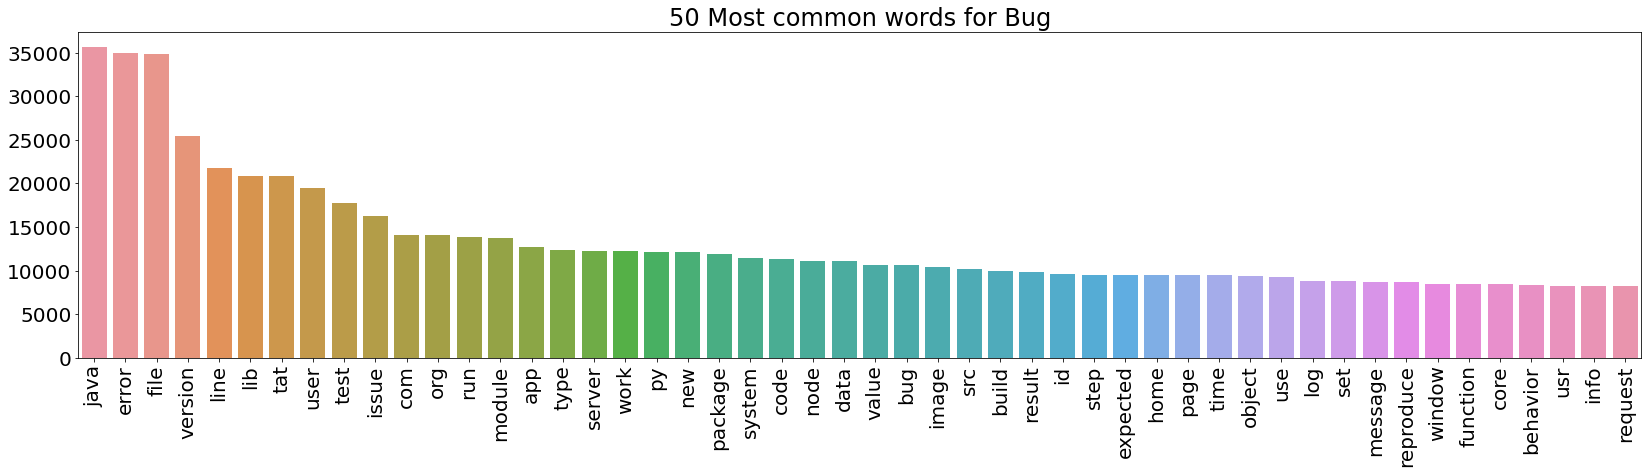

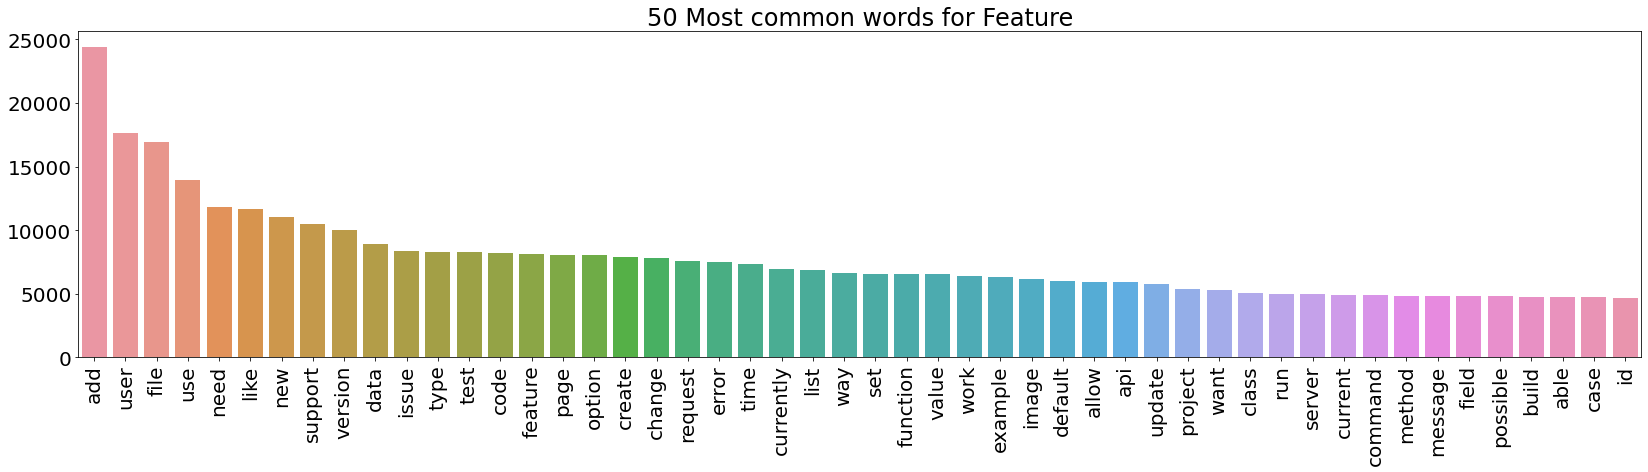

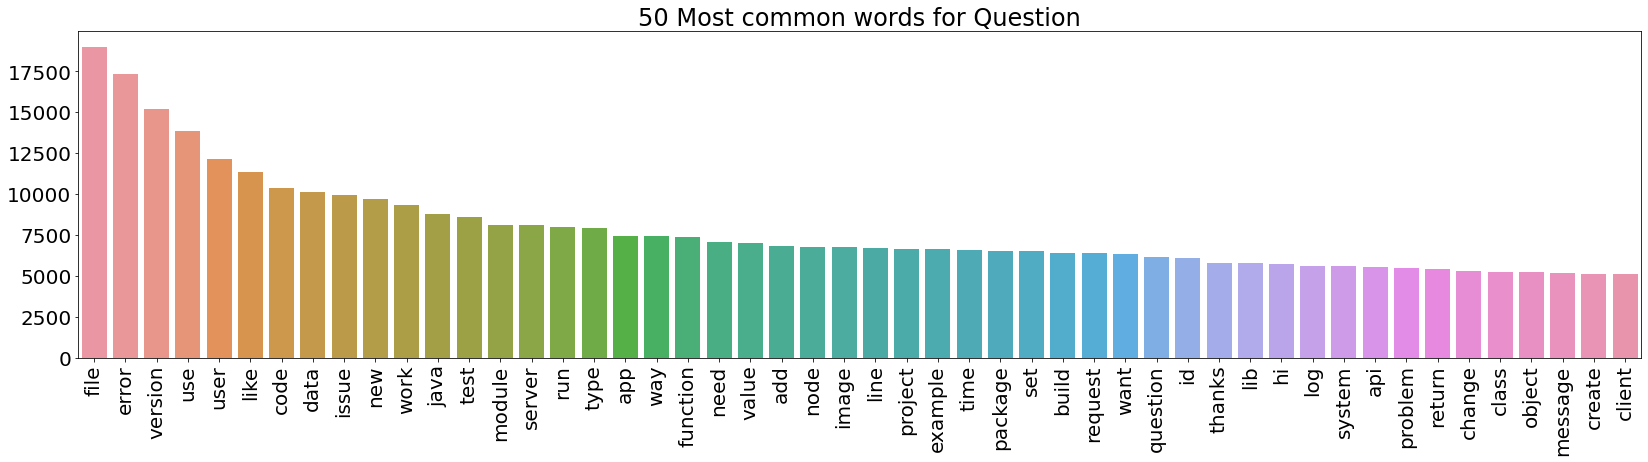

Time taken to run this cell : 0:00:45.766567


In [29]:
start = dt.datetime.now()

labels = np.unique(df.label.values)
label_names = ['Bug','Feature','Question']
for i in labels:
    plot_common_words(df,'processed_text',i,label_names[i])
    
print("Time taken to run this cell :", dt.datetime.now() - start)

<a id='5'></a>
## 6 Evaluate Algorithms and Models

In [14]:
df.to_csv("processed_4.csv", index=False)

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('processed_4.csv', encoding='utf8')

df.shape

(175618, 6)

In [12]:
from sklearn.model_selection import train_test_split

y = df['label']
X = df['processed_text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=7)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=7)

In [13]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(104492,) (104492,)
(18440,) (18440,)
(52686,) (52686,)


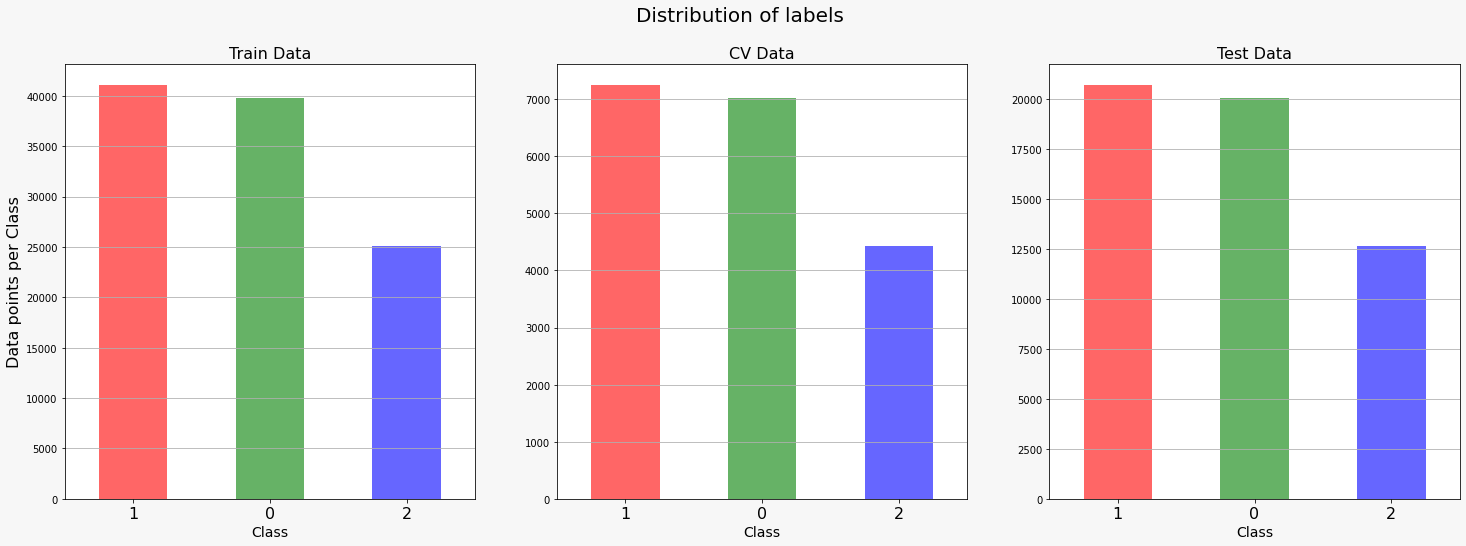

In [32]:
train_class_distribution = y_train.value_counts()
cv_class_distribution = y_cv.value_counts()
test_class_distribution = y_test.value_counts()


fig, ax = plt.subplots(1, 3, figsize=(25, 8), facecolor='#f7f7f7')
fig.suptitle('Distribution of labels', fontsize=20)

my_colors = ['r', 'g', 'b'] 

train_class_distribution.plot(kind='bar', color=my_colors, alpha=0.6, ax=ax[0])

cv_class_distribution.plot(kind='bar', color=my_colors, alpha=0.6, ax=ax[1])

test_class_distribution.plot(kind='bar', color=my_colors, alpha=0.6, ax=ax[2])


ax[0].set_title("Train Data", fontsize=16)
ax[1].set_title("CV Data", fontsize=16)
ax[2].set_title("Test Data", fontsize=16)

ax[0].set_ylabel('Data points per Class', fontsize=16)


for axes in ax:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=0, fontsize=16)
    axes.set_xlabel('Class', fontsize=14)
    axes.grid(axis='y')

plt.show()    
    

<a id='5.1'></a>
## 6.1 Training Models using BOW

In [14]:
import spacy
nlp_spcy = spacy.load("en_core_web_sm", disable=["tagger", "parser","ner"])
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer


start = dt.datetime.now()
stop_words = list(set(STOP_WORDS))
stop_words = stop_words + ['d', 'll', 'm', 'n', 's', 't', 've']

vectorizer = CountVectorizer(min_df=10, lowercase=True,stop_words= stop_words,token_pattern=r'\w+',ngram_range=(1,2),
                                     analyzer='word',max_features=20000)

vectorizer.fit(X_train.values.astype('U')) 

# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer.transform(X_train.values.astype('U'))
X_cv_bow = vectorizer.transform(X_cv.values.astype('U'))
X_test_bow = vectorizer.transform(X_test.values.astype('U'))

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("Time taken to run this cell :", dt.datetime.now() - start)

After vectorizations
(104492, 20000) (104492,)
(18440, 20000) (18440,)
(52686, 20000) (52686,)
Time taken to run this cell : 0:06:14.430430


In [34]:
print("Some feature names ", vectorizer.get_feature_names()[4900:5100])

Some feature names  ['double check', 'double click', 'double clicking', 'double double', 'double quote', 'doubled', 'doubt', 'downgrade', 'download', 'download button', 'download complete', 'download error', 'download file', 'download link', 'download page', 'download url', 'downloadable', 'downloaded', 'downloaded file', 'downloader', 'downloading', 'downloads', 'downside', 'downstream', 'downtime', 'dowork', 'doxygen', 'dozen', 'dp', 'dpi', 'dpkg', 'dplyr', 'dr', 'draft', 'drag', 'drag drop', 'draggable', 'dragged', 'dragging', 'dragon', 'drain', 'drake', 'draw', 'drawable', 'drawback', 'drawer', 'drawing', 'drawn', 'dream', 'drift', 'drill', 'drink', 'drive', 'driven', 'driver', 'driver cgroupfs', 'driver json', 'driver version', 'driving', 'drm', 'droid', 'drone', 'drop', 'drop list', 'drop menu', 'drop support', 'drop table', 'dropbox', 'dropdown', 'dropdown list', 'dropdown menu', 'dropdowns', 'droplet', 'dropped', 'dropping', 'drug', 'druid', 'drupal', 'drupal core', 'drupal vm'

In [35]:
# Number of times a particular n-gram feature appears in the corpus using BOW vectorization

list(zip(vectorizer.get_feature_names()[4900:5100], X_train_bow.sum(0).getA1()[4900:5100]))

[('double check', 54),
 ('double click', 136),
 ('double clicking', 44),
 ('double double', 51),
 ('double quote', 76),
 ('doubled', 32),
 ('doubt', 134),
 ('downgrade', 84),
 ('download', 2449),
 ('download button', 42),
 ('download complete', 37),
 ('download error', 31),
 ('download file', 129),
 ('download link', 63),
 ('download page', 41),
 ('download url', 32),
 ('downloadable', 33),
 ('downloaded', 643),
 ('downloaded file', 30),
 ('downloader', 106),
 ('downloading', 537),
 ('downloads', 480),
 ('downside', 93),
 ('downstream', 123),
 ('downtime', 52),
 ('dowork', 45),
 ('doxygen', 45),
 ('dozen', 63),
 ('dp', 135),
 ('dpi', 52),
 ('dpkg', 101),
 ('dplyr', 33),
 ('dr', 123),
 ('draft', 380),
 ('drag', 535),
 ('drag drop', 193),
 ('draggable', 44),
 ('dragged', 52),
 ('dragging', 171),
 ('dragon', 32),
 ('drain', 59),
 ('drake', 50),
 ('draw', 605),
 ('drawable', 122),
 ('drawback', 62),
 ('drawer', 239),
 ('drawing', 250),
 ('drawn', 159),
 ('dream', 36),
 ('drift', 34),
 ('dr

In [36]:
# Top words in BOW embedding
import itertools

print(dict(itertools.islice(vectorizer.vocabulary_.items(), 25)))
#print(dict(list(bow_vectorizer.vocabulary_.items())[0: 25]) )

{'allow': 649, 'html': 7898, 'tag': 17009, 'description': 4414, 'element': 5148, 'feature': 6199, 'request': 14373, 'like': 9695, 'click': 2668, 'detailed': 4486, 'info': 8349, 'use': 18450, 'lot': 10226, 'current': 3857, 'setup': 15700, 'maybe': 10495, 'restricted': 14576, 'avoid': 1364, 'html tag': 7911, 'feature request': 6220, 'request allow': 14375, 'use lot': 18489, 'display': 4707, 'class': 2593, 'annotated': 777}


<a id='5.1.1'></a>
## 6.1.1 Machine Learning using Logistic Regression and Evaluation

In [21]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cv_error(loss, hyp):
    best_hyp = np.argmin(loss)
    
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#f7f7f7')
    ax.plot(hyp, loss, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    

    # text for the box
    textstr = '\n'.join((f'Best alpha: {hyp[best_hyp]}',
                    f'Lowest Log Loss: %.3f'% np.min(loss)))
   
    # place a text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.70, 0.20, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title("Cross Validation Error for each alpha")
    ax.set_xlabel("Hyperparameter alpha")
    ax.set_ylabel("Log Loss")
    plt.grid(True)
    plt.show()   

In [22]:
# Confusion matrices.
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
  
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(25,6))
    
    labels = [0,1,2]
    
    sns.set(font_scale=1.4)
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap='GnBu', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap='GnBu', fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap='GnBu', fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title("Recall matrix")
    
    plt.show()

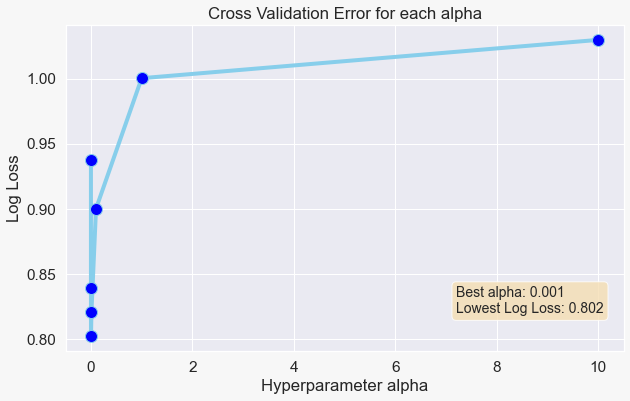

For values of best alpha = 0.001 The train log loss is: 0.740
For values of best alpha = 0.001 The test log loss is: 0.800
Total number of data points: 52686


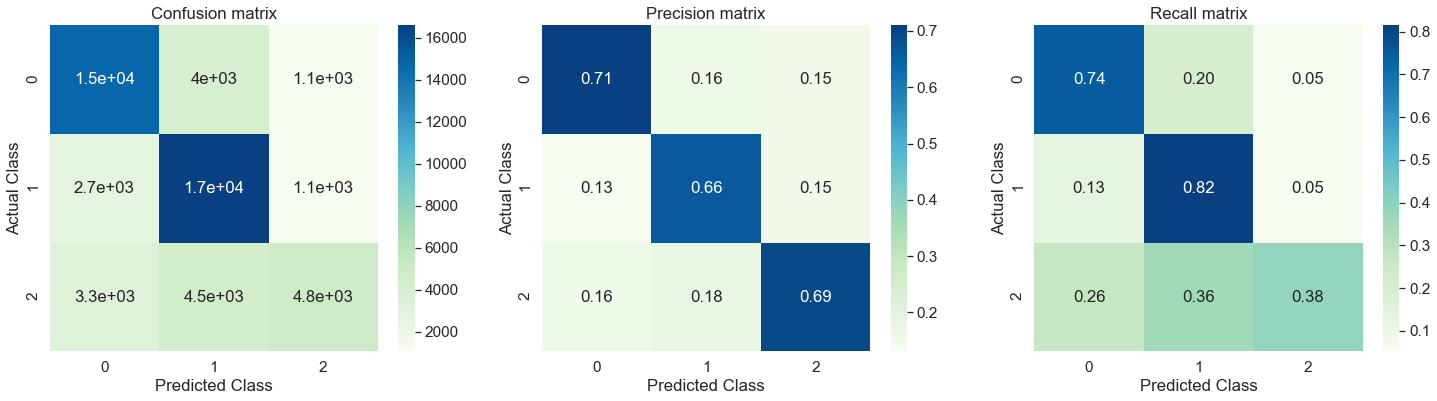

ROC AUC score = 0.836
Time taken to run this cell : 0:00:53.452118


In [25]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

start = dt.datetime.now()

alpha = [10 ** x for x in range(-5, 2)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', class_weight='balanced', random_state=42, n_jobs=-1)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', class_weight='balanced', random_state=42, n_jobs=-1)
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

plot_cv_error(cv_log_error_array, alpha)
predict_y_train = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha =', alpha[best_alpha], "The train log loss is: %.3f" %log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha =', alpha[best_alpha], "The test log loss is: %.3f" %log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
predicted_y = np.argmax(predict_y_test,axis=1)
print("Total number of data points:", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("ROC AUC score = %.3f" %roc_auc_score(y_test, sig_clf.predict_proba(X_test_bow), multi_class='ovr'))

print("Time taken to run this cell :", dt.datetime.now() - start)

<a id='5.1.2'></a>
## 6.1.2 Machine Learning using Multinomial NB and Evaluation

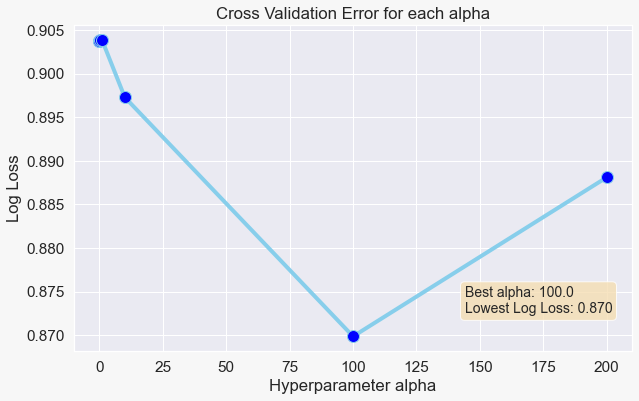

For values of best alpha = 100.0 The train log loss is: 0.853
For values of best alpha = 100.0 The test log loss is: 0.876
Total number of data points: 52686


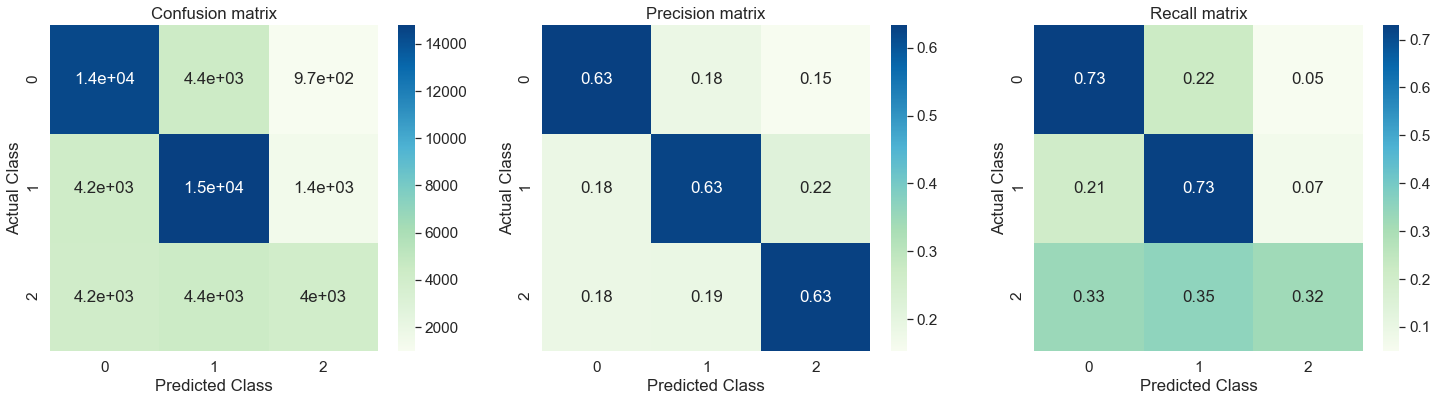

ROC AUC score = 0.756
Time taken to run this cell : 0:00:08.246572


In [24]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

start = dt.datetime.now()

alpha = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 200.0]

cv_log_error_array=[]
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

plot_cv_error(cv_log_error_array, alpha)
predict_y_train = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha =', alpha[best_alpha], "The train log loss is: %.3f" %log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha =', alpha[best_alpha], "The test log loss is: %.3f" %log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
predicted_y = np.argmax(predict_y_test,axis=1)
print("Total number of data points:", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("ROC AUC score = %.3f" %roc_auc_score(y_test, sig_clf.predict_proba(X_test_bow), multi_class='ovr'))

print("Time taken to run this cell :", dt.datetime.now() - start)

<a id='5.1.3'></a>
## 6.1.3 Machine Learning using Gradient Boosted DT and Evaluation

In [14]:
def plot_cv_error(loss, hyp):
    best_hyp = np.argmin(loss)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(hyp, loss, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    

    # text for the box
    textstr = '\n'.join((f'Best n_estimators: {hyp[best_hyp]}',
                    f'Lowest Log Loss: %.3f'% np.min(loss)))
   
    # place a text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.70, 0.20, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title("Cross Validation Error for each alpha")
    ax.set_xlabel("Hyperparameter n_estimators")
    ax.set_ylabel("Log Loss")
    plt.grid()
    plt.show()  

In [15]:
X_train_bow = X_train_bow.astype('float32')
X_cv_bow = X_cv_bow.astype('float32')
X_test_bow = X_test_bow.astype('float32')   
y_train = y_train.astype('float32')
y_cv = y_cv.astype('float32')
y_test = y_test.astype('float32')

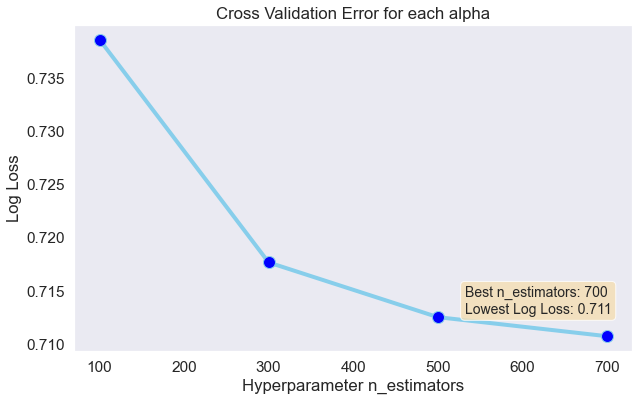

For values of best alpha = 700 The train log loss is: 0.547
For values of best alpha = 700 The test log loss is: 0.716
Total number of data points: 52686


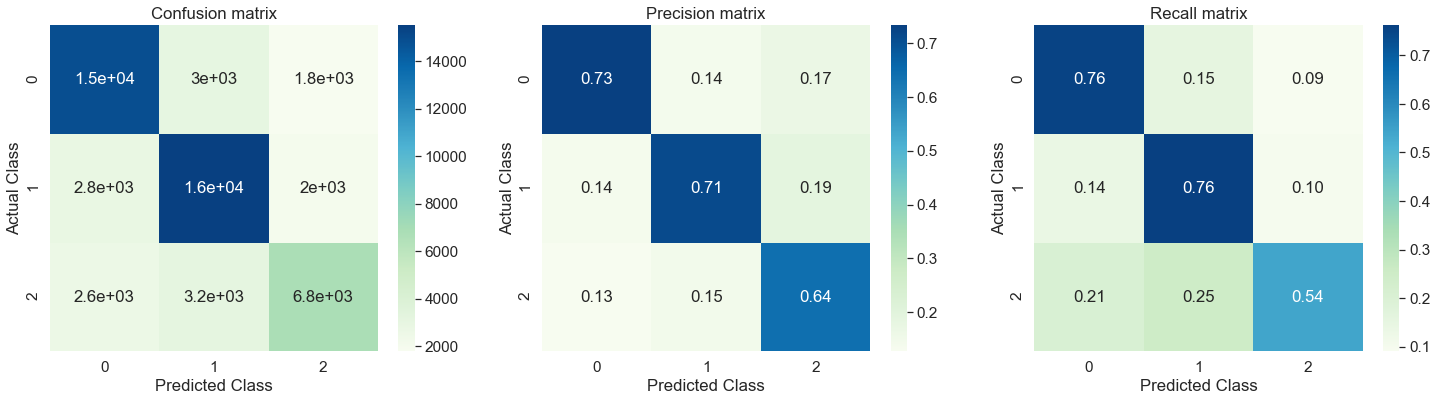

ROC AUC score = 0.856
Time taken to run this cell : 0:53:28.364027


In [16]:
from lightgbm import LGBMClassifier as lgbm

lgbm(n_estimators=500,boosting_type='gbdt',class_weight='balanced',random_state=42,n_jobs=-1)

start = dt.datetime.now()

estimators = [100, 300, 500, 700]

cv_log_error_array=[]
for i in estimators:
    clf = lgbm(n_estimators=i,boosting_type='gbdt',class_weight='balanced',random_state=42,n_jobs=-1)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_cv_bow)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
best_est = np.argmin(cv_log_error_array)
    
clf = lgbm(n_estimators=estimators[best_est],boosting_type='gbdt',class_weight='balanced',random_state=42,n_jobs=-1)
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

plot_cv_error(cv_log_error_array, estimators)
predict_y_train = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha =', estimators[best_est], "The train log loss is: %.3f" %log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha =', estimators[best_est], "The test log loss is: %.3f" %log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
predicted_y = np.argmax(predict_y_test,axis=1)
print("Total number of data points:", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("ROC AUC score = %.3f" %roc_auc_score(y_test, sig_clf.predict_proba(X_test_bow), multi_class='ovr'))

print("Time taken to run this cell :", dt.datetime.now() - start)

<a id='5.2'></a>
## 6.2 Training Models using Glove Embeddings

In [26]:
from tqdm import tqdm
import numpy as np

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

model = loadGloveModel('glove.6B.300d.txt')

Loading Glove Model


400000it [00:56, 7083.66it/s]

Done. 400000  words loaded!


In [27]:
words = []
for i in processed_text:
    words.extend(i.split(' '))

print("all the words in the corpus", len(words))
words = set(words)

print("the unique words in the corpus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our corpus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

all the words in the corpus 8582563
the unique words in the corpus 310427
The number of words that are present in both glove vectors and our corpus 47274 ( 15.229 %)


In [28]:
words_corpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_corpus[i] = model[i]
print("word 2 vec length", len(words_corpus))

word 2 vec length 47274


In [29]:
def avg_w2v(processed_text):
    avg_w2v_vectors = []
    for sentence in tqdm(processed_text):
        vector = np.zeros(300)
        cnt_words =0
        for word in sentence.split():
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
    return avg_w2v_vectors

In [30]:
from sklearn.model_selection import train_test_split

y = df['label'].values
X = df['processed_text'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=7)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=7)

In [31]:
glove_words =  set(model.keys())

In [32]:
X_train_aw2v = avg_w2v(X_train)

100%|████████████████████████████████████████████████████████████████████████| 104492/104492 [00:10<00:00, 9727.85it/s]

104492
300


In [33]:
X_cv_aw2v = avg_w2v(X_cv)

100%|██████████████████████████████████████████████████████████████████████████| 18440/18440 [00:01<00:00, 9812.07it/s]

18440
300


In [34]:
X_test_aw2v = avg_w2v(X_test)

100%|██████████████████████████████████████████████████████████████████████████| 52686/52686 [00:05<00:00, 9712.81it/s]

52686
300


In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
normalizer = preprocessing.Normalizer()

X_train_aw2v = normalizer.fit_transform(X_train_aw2v)
X_cv_aw2v = normalizer.transform(X_cv_aw2v)
X_test_aw2v = normalizer.transform(X_test_aw2v)

<a id='5.2.1'></a>
## 6.2.1 Machine Learning using Logistic Regression and Evaluation

In [36]:
def plot_cv_error(loss, hyp):
    best_hyp = np.argmin(loss)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(hyp, loss, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    

    # text for the box
    textstr = '\n'.join((f'Best alpha: {hyp[best_hyp]}',
                    f'Lowest Log Loss: %.3f'% np.min(loss)))
   
    # place a text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.70, 0.20, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title("Cross Validation Error for each alpha")
    ax.set_xlabel("Hyperparameter alpha")
    ax.set_ylabel("Log Loss")
    plt.grid(True)
    plt.show()   

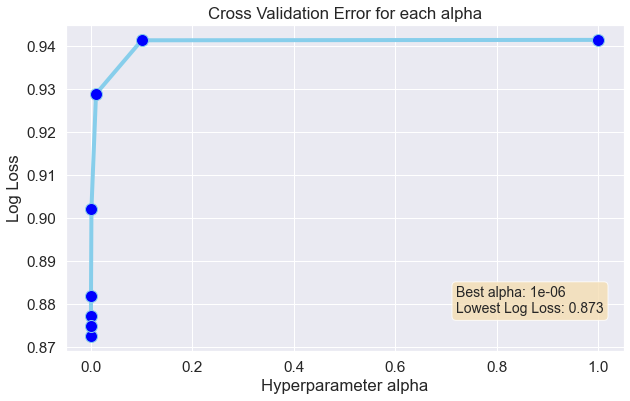

For values of best alpha = 1e-06 The train log loss is: 0.865
For values of best alpha = 1e-06 The test log loss is: 0.872
Total number of data points: 52686


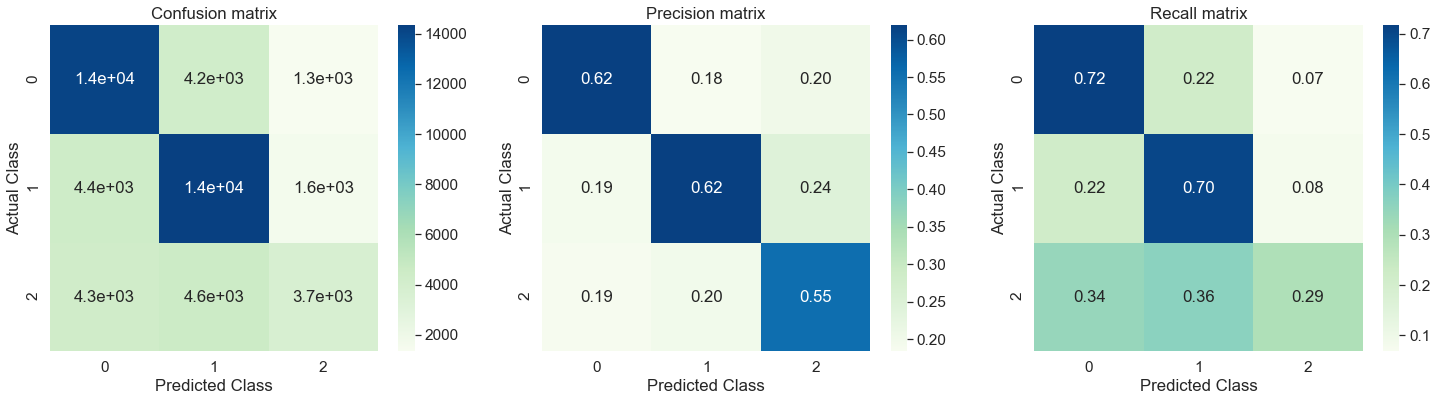

ROC AUC score = 0.771
Time taken to run this cell : 0:04:02.872139


In [37]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

start = dt.datetime.now()

alpha = [10 ** x for x in range(-7, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', class_weight='balanced', random_state=42, n_jobs=-1)
    clf.fit(X_train_aw2v, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_aw2v, y_train)
    predict_y = sig_clf.predict_proba(X_cv_aw2v)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', class_weight='balanced', random_state=42, n_jobs=-1)
clf.fit(X_train_aw2v, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_aw2v, y_train)

plot_cv_error(cv_log_error_array, alpha)
predict_y_train = sig_clf.predict_proba(X_train_aw2v)
print('For values of best alpha =', alpha[best_alpha], "The train log loss is: %.3f" %log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test_aw2v)
print('For values of best alpha =', alpha[best_alpha], "The test log loss is: %.3f" %log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
predicted_y = np.argmax(predict_y_test,axis=1)
print("Total number of data points:", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("ROC AUC score = %.3f" %roc_auc_score(y_test, sig_clf.predict_proba(X_test_aw2v), multi_class='ovr'))

print("Time taken to run this cell :", dt.datetime.now() - start)

<a id='5.2.2'></a>
## 6.2.2 Machine Learning using Gradient Boosted DT and Evaluation

In [40]:
def plot_cv_error(loss, hyp):
    best_hyp = np.argmin(loss)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(hyp, loss, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    

    # text for the box
    textstr = '\n'.join((f'Best n_estimators: {hyp[best_hyp]}',
                    f'Lowest Log Loss: %.3f'% np.min(loss)))
   
    # place a text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.70, 0.20, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    ax.set_title("Cross Validation Error for each alpha")
    ax.set_xlabel("Hyperparameter n_estimators")
    ax.set_ylabel("Log Loss")
    plt.grid(True)
    plt.show()  

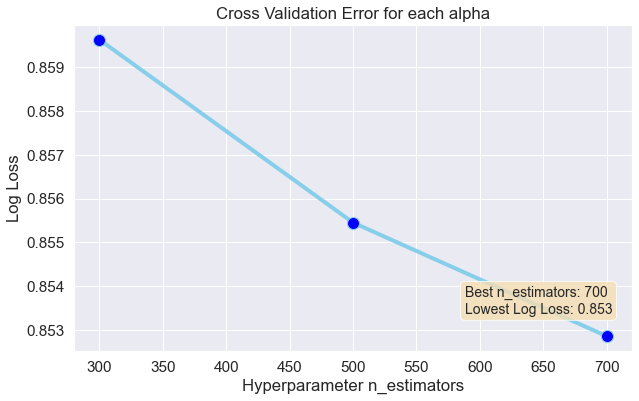

For values of best alpha = 700 The train log loss is: 0.498
For values of best alpha = 700 The test log loss is: 0.854
Total number of data points: 52686


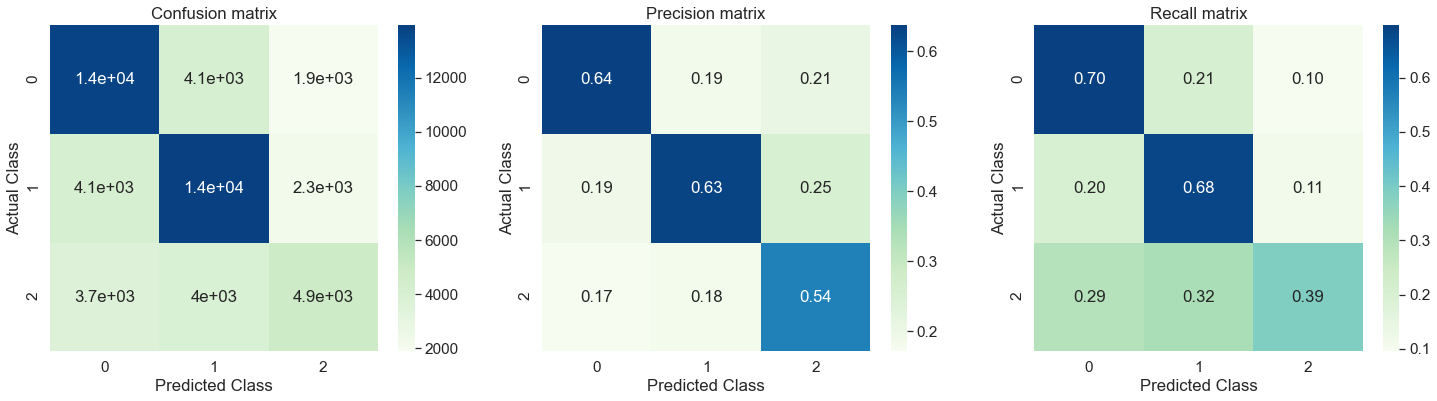

ROC AUC score = 0.784
Time taken to run this cell : 0:54:33.865125


In [41]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier as lgbm
from sklearn.metrics import roc_auc_score

lgbm(n_estimators=500,boosting_type='gbdt',class_weight='balanced',random_state=42,n_jobs=-1)

start = dt.datetime.now()

estimators = [300, 500, 700]

cv_log_error_array=[]
for i in estimators:
    clf = lgbm(n_estimators=i,boosting_type='gbdt',class_weight='balanced',random_state=42,n_jobs=-1)
    clf.fit(X_train_aw2v, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_aw2v, y_train)
    predict_y = sig_clf.predict_proba(X_cv_aw2v)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
best_est = np.argmin(cv_log_error_array)
    
clf = lgbm(n_estimators=estimators[best_est],boosting_type='gbdt',class_weight='balanced',random_state=42,n_jobs=-1)
clf.fit(X_train_aw2v, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_aw2v, y_train)

plot_cv_error(cv_log_error_array, estimators)
predict_y_train = sig_clf.predict_proba(X_train_aw2v)
print('For values of best alpha =', estimators[best_est], "The train log loss is: %.3f" %log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
predict_y_test = sig_clf.predict_proba(X_test_aw2v)
print('For values of best alpha =', estimators[best_est], "The test log loss is: %.3f" %log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
predicted_y = np.argmax(predict_y_test,axis=1)
print("Total number of data points:", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("ROC AUC score = %.3f" %roc_auc_score(y_test, sig_clf.predict_proba(X_test_aw2v), multi_class='ovr'))

print("Time taken to run this cell :", dt.datetime.now() - start)

<a id='5.2'></a>
## 6.2 Training Model using LSTM

In [11]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

from keras.models import Sequential
from keras import models, layers, preprocessing as KP
from keras.layers.embeddings import Embedding
from keras import backend as KB

2.5.0


In [12]:
list_of_sentences = list(df.processed_text.str.split())
print(f"First sentence : {list_of_sentences[0]}")

First sentence : ['zoom', 'piano', 'roll', 'zoom', 'piano', 'roll', 'useful']


In [46]:
list_of_sentences = [sent for sent in list_of_sentences if len(sent) > 0]

In [14]:
import numpy as np

max_sent_length = np.max(np.sort([len(sent) for sent in list_of_sentences]))
print(f"Maximum number of words in sequence: {max_sent_length}")
min_sent_length = np.min(np.sort([len(sent) for sent in list_of_sentences]))
print(f"Minimum number of words in sequence: {min_sent_length}")
avg_sent_length = np.mean(np.sort([len(sent) for sent in list_of_sentences]))
print(f"Average length of the number of words in sequence : {avg_sent_length}")
median_sent_length = np.median(np.sort([len(sent) for sent in list_of_sentences]))
print(f"Median length of the number of words in sequence post cleanup : {median_sent_length}")

Maximum number of words in sequence: 6981
Minimum number of words in sequence: 0
Average length of the number of words in sequence : 48.86987666412327
Median length of the number of words in sequence post cleanup : 27.0


A max sequence length of 50 will be used for text to sequence conversion

In [15]:
# tokenize text
tokenizer = KP.text.Tokenizer(lower=True, split=' ', oov_token="NaN", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(list_of_sentences)
vocab_dict = tokenizer.word_index

In [16]:
# Few samples and total words
print(dict(list(vocab_dict.items())[0:10]))
print("Total length of vocabulary:", len(list(vocab_dict.items())))

{'NaN': 1, 'file': 2, 'error': 3, 'version': 4, 'user': 5, 'java': 6, 'add': 7, 'use': 8, 'issue': 9, 'test': 10}
Total length of vocabulary: 310426


In [17]:
# Create tokenized sequences 
text_seq = tokenizer.texts_to_sequences(list_of_sentences)

In [18]:
# Padding the tokenized sequences
seq_corpus = KP.sequence.pad_sequences(text_seq, maxlen=50, padding="post", truncating="post")

In [19]:
len(seq_corpus)

175618

In [22]:
from sklearn.model_selection import train_test_split

#Split the dataset into training and test sets
y = df['label'].values
X = seq_corpus
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
train_x.shape,train_y.shape,test_x.shape,test_y.shape
len(train_x), len(train_y), len(test_x), len(test_y)

(140494, 140494, 35124, 35124)

In [23]:
# Convert class labels to multi class matrices.
train_y = keras.utils.to_categorical(train_y, 3)
test_y_conv = keras.utils.to_categorical(test_y, 3)

In [24]:
# Initialize embeddings matrix with 0s and shape (length of vocabulary x vector size)
embeddings_mat = np.zeros((len(vocab_dict)+1, 300))

for word,idx in vocab_dict.items():
    # update the row with vector
    try:
        embeddings_mat[idx] =  w2v_model.wv[word]
    # if word not in model then skip and the row stays all 0s
    except:
        pass

In [25]:
print(f"Shape of Embeddings Matrix: {embeddings_mat.shape}")

Shape of Embeddings Matrix: (310427, 300)


In [26]:
# Build a bidirectional LSTM model
model = Sequential()
model.add(layers.Embedding(input_dim=embeddings_mat.shape[0], output_dim=embeddings_mat.shape[1],weights=[embeddings_mat], input_length=50, trainable=False))
model.add(layers.Bidirectional(layers.LSTM(units=50,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(units=50)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy','AUC'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           93128100  
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 100)           140400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 93,335,559
Trainable params: 207,459
Non-trainable params: 93,128,100
_________________________________________________________________
None


In [ ]:
# Training the model
training = model.fit(x=train_x, y=train_y, batch_size=128, epochs=20, shuffle=True, verbose=1, validation_split=0.2)

Epoch 1/20
178/879 [=====>........................] - ETA: 2:14 - loss: 1.0931 - accuracy: 0.3830 - auc: 0.5655

<a id='5.4'></a>
## 6.4 Training Model using BERT Transformer (WIP...)